In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import regex as re


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/spam.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.sample(10)

,Category,Message
1285,ham,But if she.s drinkin i'm ok.
759,ham,U should have made an appointment
4811,ham,"Honey, can you pls find out how much they sell..."
2752,ham,Play w computer? Aiyah i tok 2 u lor?
3213,ham,We got a divorce. Lol. She.s here
5177,ham,Very strange. and are watching the 2nd one n...
3947,ham,How u doin baby girl ?? hope u are okay every ...
3927,ham,I havent add ü yet right..
5142,ham,Now that you have started dont stop. Just pray...
1594,spam,PRIVATE! Your 2003 Account Statement for shows...


In [5]:
df = df.drop_duplicates()

In [6]:
df.result = df.Category.apply(lambda x: 1 if x == 'spam' else 0).astype(int)

df.Category.value_counts()

/tmp/ipykernel_38117/1114342450.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.result = df.Category.apply(lambda x: 1 if x == 'spam' else 0).astype(int)


Category
ham     4516
spam     641
Name: count, dtype: int64

In [7]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]',' ',text) # r = raw text
    text = text.strip() # remove spaces 
    text = re.sub(r'\s+',' ', text) # \s = blank space, + = one or more characters
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
    return text.split()

df.Message = df.Message.apply(preprocess_text)

In [8]:
the_sentence = 'mary likes apples'
the_sentence_clean = re.sub("mary", 'diana', the_sentence)
the_sentence_clean

'diana likes apples'

In [9]:
the_sentence_clean.split()

['diana', 'likes', 'apples']

In [10]:
the_sentence_clean.split()[0]

'diana'

In [11]:
my_sentence = 'james likes        bananas'
my_sentence_clean = re.sub(r'\s+',' ',my_sentence)
my_sentence_clean

'james likes bananas'

In [12]:
my_blank = '  cat   '
my_blank.strip()

'cat'

In [13]:
my_text = 'dog$'
my_text_clean = re.sub(r'[^a-z]','.',my_text)
print(my_text_clean)

dog.


In [14]:
my_text_2 = 'Dog$'
my_text_clean_2 = re.sub(r'[^a-zA-Z]','.',my_text_2)
print(my_text_clean_2)

Dog.


In [15]:
df.sample(10)

,Category,Message
327,ham,"[hi, da, how, is, the, todays, class]"
3808,ham,"[pls, dont, restrict, her, from, eating, anyth..."
493,ham,"[sorry, in, meeting, i, ll, call, later]"
4597,ham,"[carlos, is, down, but, i, have, to, pick, it,..."
4214,ham,"[i, attended, but, nothing, is, there]"
4176,ham,"[how, are, you, doing, how, s, the, queen, are..."
1644,ham,"[u, will, switch, your, fone, on, dammit]"
5331,ham,"[x, course, it, yrs, just, so, her, messages, ..."
1400,ham,"[you, have, registered, sinco, as, payee, log,..."
1973,ham,"[yes, but, can, we, meet, in, town, cos, will,..."


In [16]:
my_wrong_text = 'Jimmy iz a good fella'
my_clean_text = re.sub('iz', 'is', my_wrong_text)
my_clean_text

'Jimmy is a good fella'

In [17]:
download('wordnet') 

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
lemmatizer = WordNetLemmatizer() # running, runner, ran = run
stop_words = stopwords.words('english')

In [20]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
df

,Category,Message
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."
...,...,...
5567,spam,"[this, is, the, nd, time, we, have, tried, con..."
5568,ham,"[will, b, going, to, esplanade, fr, home]"
5569,ham,"[pity, was, in, mood, for, that, so, any, othe..."
5570,ham,"[the, guy, did, some, bitching, but, i, acted,..."


In [22]:
df =df.reset_index(inplace=False, drop=True)

In [23]:
def lemmatize_text(words, lemmatizer=lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 2]
    return tokens

df['Message'] = df['Message'].apply(lemmatize_text)


In [24]:
df

,Category,Message
0,ham,"[jurong, point, crazy, available, bugis, great..."
1,ham,"[lar, joking, wif, oni]"
2,spam,"[free, entry, wkly, comp, win, cup, final, tkt..."
3,ham,"[dun, say, early, hor, already, say]"
4,ham,"[nah, think, usf, life, around, though]"
...,...,...
5152,spam,"[time, tried, contact, pound, prize, claim, ea..."
5153,ham,"[going, esplanade, home]"
5154,ham,"[pity, mood, suggestion]"
5155,ham,"[guy, bitching, acted, like, interested, buyin..."


In [25]:
from wordcloud import WordCloud

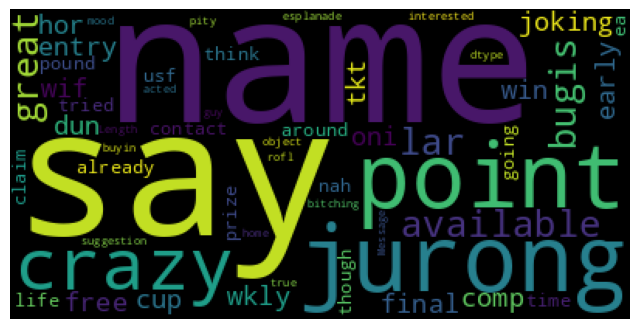

In [26]:
wordcloud = WordCloud(max_words=1000).generate(str(df['Message']))

fig = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_list = df.Message
df_list = [' '.join(tokens) for tokens in df_list]
vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=5)
X = vectorizer.fit_transform(df_list).toarray()
y = df.Category

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
model = SVC(kernel='linear', random_state=2030)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=2030)

In [30]:
y_hat = model.predict(X_test)

In [31]:
accuracy_score(y_test, y_hat)

0.9844961240310077

In [32]:
# SVM (SVC) = support vector machines. Searches for the hyperplane that maximizes separation between classes.